In [1]:
#Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

We import required libraries.

In [2]:
# Loading data:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We load data from github. Here we see it's first five rows and columns.

In [3]:
df.shape

(891, 12)

We see leangth of our data.

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We see our data's column name.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see that our data has different types of datatype and non null values in it.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we see null valles present in Age, Cabin and Embarked column.

<AxesSubplot:>

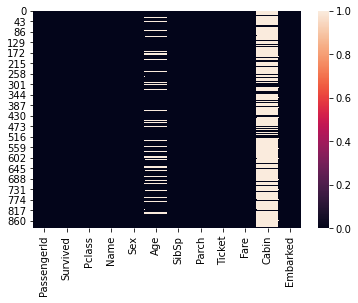

In [7]:
sns.heatmap(df.isnull())

Here we visualize null values through graph.

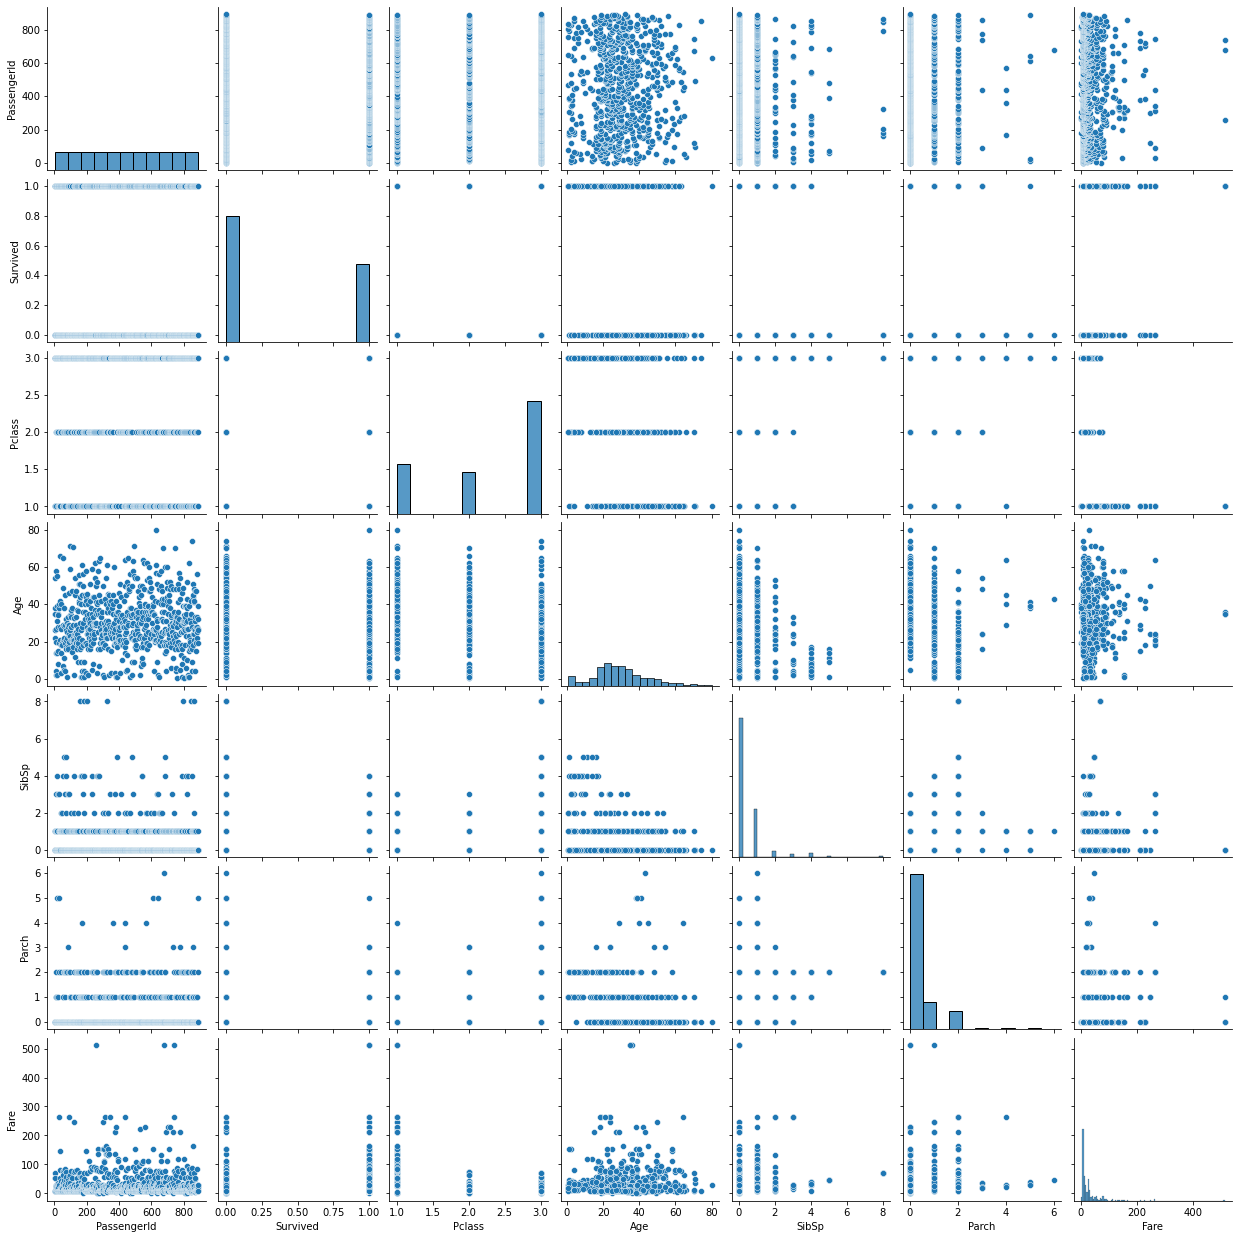

In [8]:
sns.pairplot(df)
plt.show()

Here we see relation between different columns through pairplot.

# Data cleaning

In [9]:
# Handling null values:
df = df.drop(['Cabin', 'Name', 'Ticket'], axis = 1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Here cabin, name and tickets are not affect on survival of people so, we drop them.

In [10]:
df['Age'].mean()

29.69911764705882

We see 'Age' has also null values but we can't drop it. So we calculate mean of Age.

In [11]:
# Replacing the null values by mean of column:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We see there are three catagorical values in embarkes column.

In [13]:
print(df['Embarked'].mode())

0    S
dtype: object


Here mode shows most frequent value in column 'Embarked'.It's data type is object so, most frequent value is use for filling nan values. 

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

Here we fill missing values by mode value.

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Now we see there is no any null values in side data.

# EDA Begins

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we see data's count, mean, standard, minimum, maximum values with it's quartile.
It only show numerical data.

In [17]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


We see correlation between data.

<AxesSubplot:>

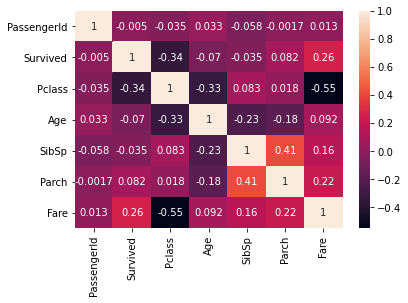

In [18]:
sns.heatmap(df.corr(), annot = True)

We show correlation by heatmap.

In [19]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Here we can not see any skewness in data.

In [20]:
# Suvived column is our target column:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here 0 equals to dead and 1 equals to survived. We see dead persons are more then alive persons.

<AxesSubplot:xlabel='Survived', ylabel='count'>

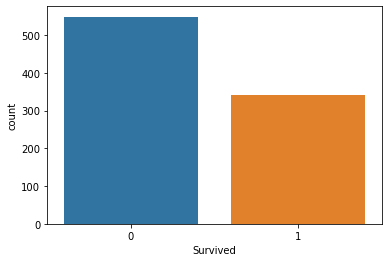

In [21]:
sns.countplot('Survived', data = df)

Here we see ratio of dead person to survived person through graph.

In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Here we calculat numbers of male and female on the ship.

<AxesSubplot:xlabel='Sex', ylabel='count'>

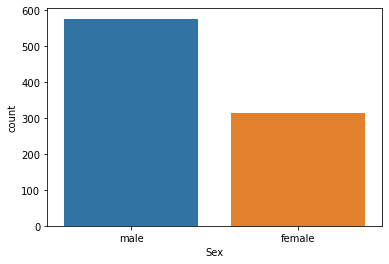

In [23]:
sns.countplot('Sex', data = df)

Showing sex data through countplot.

<AxesSubplot:xlabel='Sex', ylabel='count'>

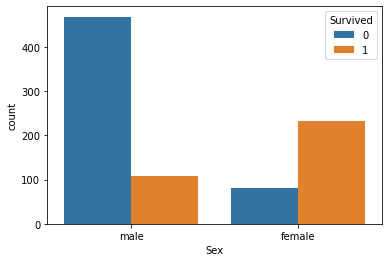

In [24]:
sns.countplot('Sex', hue = 'Survived', data = df)

Here we divide gender in survived persons. We see females are more survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

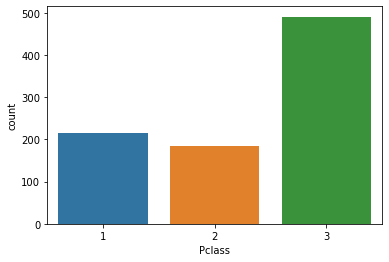

In [25]:
sns.countplot('Pclass', data = df)

Here we see passanger class through countplot graph. It shows 3rd class hass most passangers.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

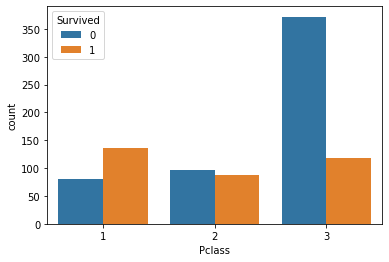

In [26]:
sns.countplot('Pclass', hue = 'Survived', data = df)

Here we see in 3rd class has most dead persons and we also see that female of 1st class are survived more compare to all groups.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

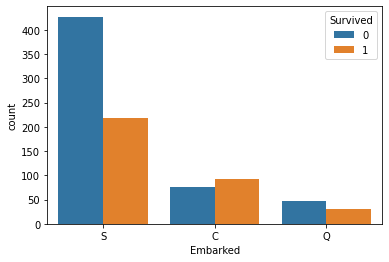

In [27]:
sns.countplot('Embarked', hue = 'Survived', data = df)

Here we see most survived persons(female) are from 's' .

In [28]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


# Encoding the categorical columns

In [29]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Here we have two categorical columns. Now we change them in to 0 and 1.

In [31]:
# using label encoder to convert categorical columns:
df.replace({'Sex':{'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q': 2}}, inplace = True )
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,0
1,2,1,1,1,38.000000,1,0,71.2833,1
2,3,1,3,1,26.000000,0,0,7.9250,0
3,4,1,1,1,35.000000,1,0,53.1000,0
4,5,0,3,0,35.000000,0,0,8.0500,0
5,6,0,3,0,29.699118,0,0,8.4583,2
6,7,0,1,0,54.000000,0,0,51.8625,0
7,8,0,3,0,2.000000,3,1,21.0750,0
8,9,1,3,1,27.000000,0,2,11.1333,0
9,10,1,2,1,14.000000,1,0,30.0708,1


Here we convert categorical values into integer.

# Seprating column into target and feature.

In [32]:
x = df.drop(['Survived', 'PassengerId'], axis = 1)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


Here we seprate features columns.We also drop two more columns which not affect target(survival).

In [33]:
y = df.iloc[:,[1]]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Here we seprate target column.

# Spliting the data into Train and Test data:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 41)

In [35]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [36]:
print(y.shape, y_train.shape, y_test.shape)

(891, 1) (712, 1) (179, 1)


# Training The Model

In [37]:
# using LogisticRegression:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

calling LogisticRegression by variable name.

In [38]:
lg.coef_

array([[-1.13434738e+00,  2.46283812e+00, -4.53514427e-02,
        -3.72150290e-01, -1.46397688e-01,  1.99547574e-03,
         3.13556091e-01]])

Finding coeficient value.

In [39]:
lg.intercept_

array([2.4869818])

Finding intercept point.

In [40]:
lg.score(x_train, y_train)

0.800561797752809

Finding accuracy score which is 80%. This means it work upto 80%.

In [41]:
pred = lg.predict(x_test)
print('Predicted Survived:', pred)
print('Actual Survived', y_test)

Predicted Survived: [0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0]
Actual Survived      Survived
454         0
624         0
537         1
685         0
396         0
..        ...
506         1
648         0
421         0
879         1
532         0

[179 rows x 1 columns]


Distinguish predicted and actual survived.

# Model Evalution

Finding Accuracy Score

In [42]:
x_train_pred = lg.predict(x_train)
x_train_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

Here model predicted all the value in the form of 0 and 1.

In [43]:
x_train_pred.shape

(712,)

In [44]:
training_data_accuracy = accuracy_score(y_train, x_train_pred)
print('Accuracy Score of training data :', training_data_accuracy)

Accuracy Score of training data : 0.800561797752809


Here train data shows accuracy 80%.

In [45]:
x_test_pred = lg.predict(x_test)
x_test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [46]:
x_test_pred.shape

(179,)

In [47]:
testing_data_accuracy = accuracy_score(y_test, x_test_pred)
print('Accuracy Score of testing data :', testing_data_accuracy)

Accuracy Score of testing data : 0.8044692737430168


Here we see the accuracy of train and test is the same 80%. So, our model is working well.

In [48]:
df = pd.DataFrame(pred)
df.to_csv('survived_predicted.csv')

Here we make dataframe for predicted data.